# HW4

### Completed by: ____TODO YOUR NAME HERE ____

Remember, the authoritative HW4 instructions are on the course website: http://www.cs.tufts.edu/comp/135/2019s/hw4.html

Please report any questions to the course Piazza page:

In [2]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

In [4]:
from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

In [5]:
%matplotlib inline

# Problem 1: XOR

In [6]:
# Load data
x_tr_N2 = np.loadtxt('./data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('./data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('./data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('./data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

## Problem 1a: MLP size [2] with activation ReLU and L-BFGS solver

In [28]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list called mlp_relu_lbfgs_list 

n_runs = 16
mlp_relu_lbfgs_list = []
for i in range (1,17):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=(i-1),
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
    i-1, n_runs, elapsed_time_sec,
    len(mlp_lbfgs.loss_curve_),
    'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
    mlp_lbfgs.loss_))
    mlp_relu_lbfgs_list.append(mlp_lbfgs)

finished LBFGS run  0/16 after    0.0 sec |  24 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  2/16 after    0.0 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.0 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  6/16 after    0.0 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  8/16 after    0.0 sec |  15 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.0 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 10/16 after    0.0 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.0 sec |  28 iters | converged    | loss 0.477
finished LBFGS r

### 1a(i): Visualize probabilistic predictions in 2D feature space for ReLU+LBFGS

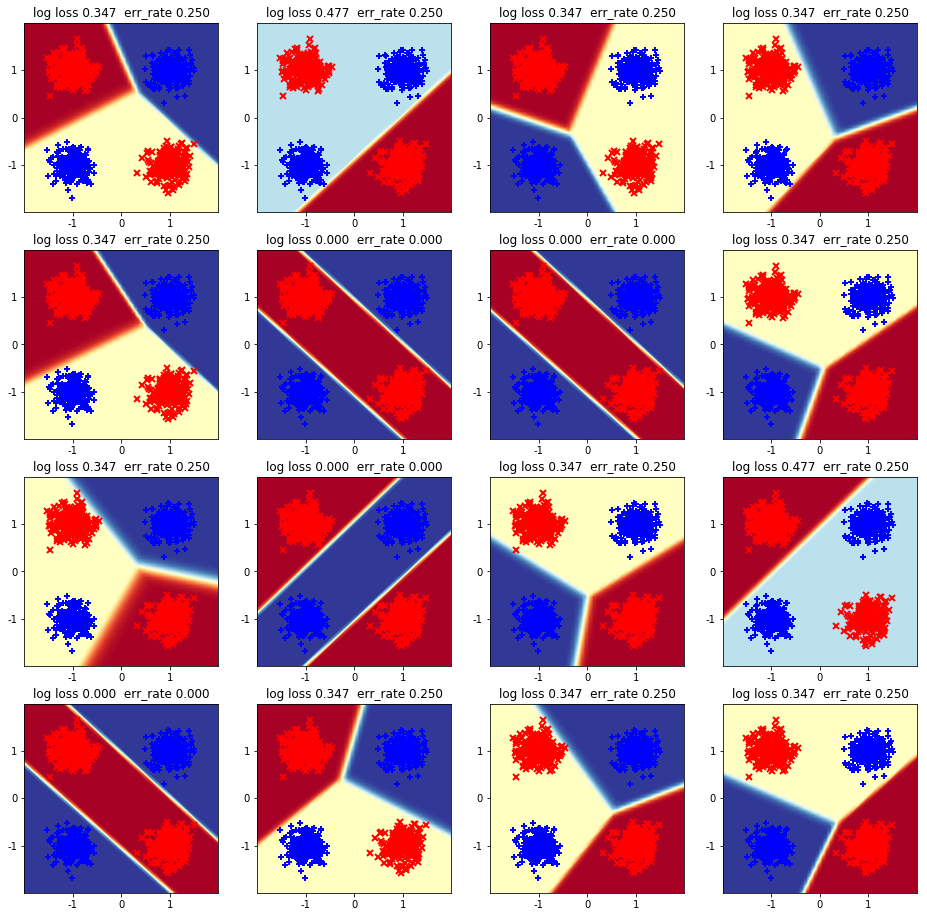

In [29]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[0], x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[1], x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[2], x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[3], x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[4], x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[5], x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[6], x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[7], x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[8], x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[9], x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[10], x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[11], x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[12], x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[13], x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[14], x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_relu_1bfgs_list[15], x_tr_N2, y_tr_N, ax=ax_grid[3,3])

### 1a(ii): What fraction of runs reach 0 training error? What happens to the other runs? Describe how rapidly (or slowly) things seem to converge).

**Answer**: 4/16 of the runs reach 0 training error. For the other runs, a local minimum is reached which results in wrong predictions being made. This is responsible for the 0.25 error rates observed in these other runs. Runtimes for ReLU+LBFGS are very fast (almost instantaneous at 0.0s for all runs)

## Problem 1b: MLP size [2] with activation Logistic and L-BFGS solver


In [30]:
# TODO edit this block to run from 16 different random_states with LOGISTIC activation

# Save each run's trained classifier object in a list called mlp_logistic_lbfgs_list 

n_runs = 16
mlp_logistic_lbfgs_list = []
for i in range (1,17):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=(i-1),
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_lbfgs.loss_curve_),
    'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
    mlp_lbfgs.loss_))
    mlp_logistic_lbfgs_list.append(mlp_lbfgs)

finished LBFGS run  1/16 after    0.0 sec |  58 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.1 sec | 105 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  77 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  1/16 after    0.0 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  1/16 after    0.0 sec |  61 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.1 sec | 101 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec | 105 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.0 sec |  95 iters | converged    | loss 0.347
finished LBFGS r

### 1b(i): Visualize probabilistic predictions in 2D feature space for LogisticSigmoid+LBFGS

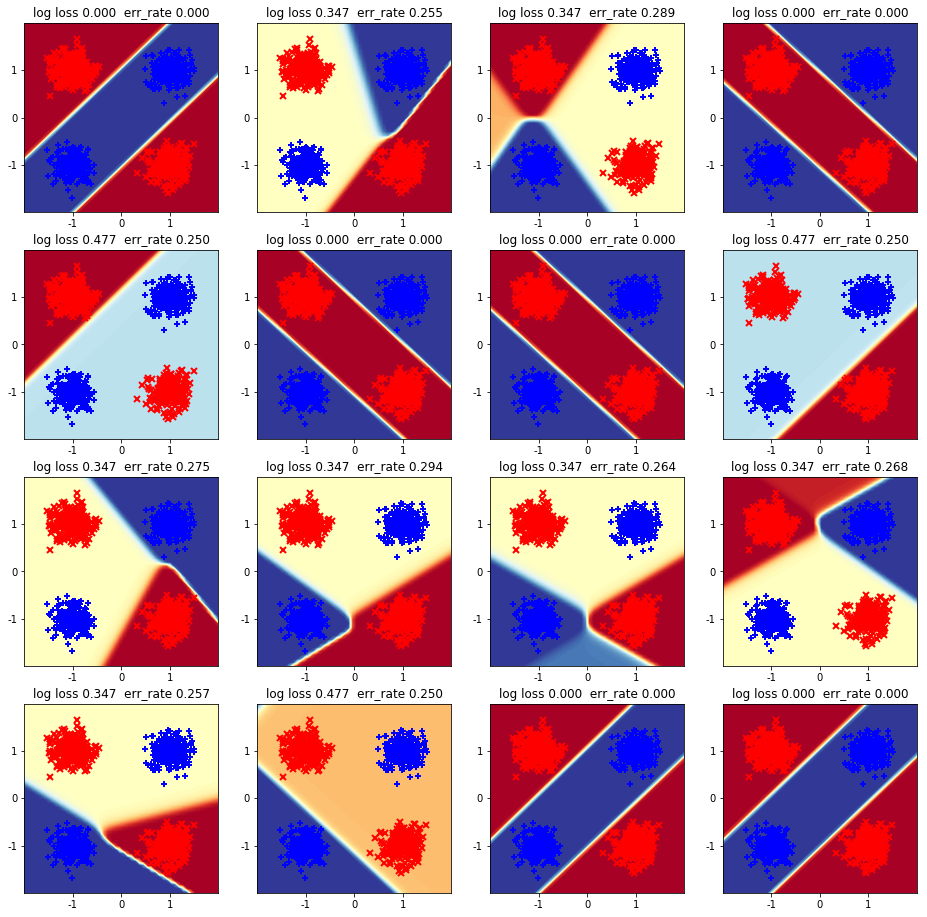

In [31]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[0], x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[1], x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[2], x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[3], x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[4], x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[5], x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[6], x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[7], x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[8], x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[9], x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[10], x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[11], x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[12], x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[13], x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[14], x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_logistic_1bfgs_list[15], x_tr_N2, y_tr_N, ax=ax_grid[3,3])


### 1b(ii): What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1b converge).




**Answer**: 6/16 of the runs reach 0 training error. For the other runs, a local minimum is reached which results in wrong predictions being made. This is responsible for the >0 error rates observed in these other runs. Runtimes for LogisticSigmoid+LBFGS are very fast (0.0-0.1s for all runs)

## Problem 1c: MLP size [2] with activation ReLU and SGD solver

In [12]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list called mlp_relu_sgd_list 

n_runs = 16
mlp_relu_sgd_list = []
for i in range (1,17):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=(i-1),
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i-1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    mlp_relu_sgd_list.append(mlp_sgd)

finished SGD run  0/16 after    1.3 sec |  93 epochs | converged     | loss 0.348
finished SGD run  1/16 after    1.2 sec |  95 epochs | converged     | loss 0.479
finished SGD run  2/16 after    2.4 sec | 186 epochs | converged     | loss 0.348
finished SGD run  3/16 after    5.2 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  4/16 after    1.5 sec | 116 epochs | converged     | loss 0.348
finished SGD run  5/16 after    5.1 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  6/16 after    5.1 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after    2.4 sec | 172 epochs | converged     | loss 0.348
finished SGD run  8/16 after    1.4 sec | 107 epochs | converged     | loss 0.347
finished SGD run  9/16 after    5.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 10/16 after    1.3 sec | 100 epochs | converged     | loss 0.479
finished SGD run 11/16 after    1.2 sec |  94 epochs | converged     | loss 0.479
finished SGD run

### 1c(i): Visualize probabilistic predictions in 2D feature space for ReLU+SGD

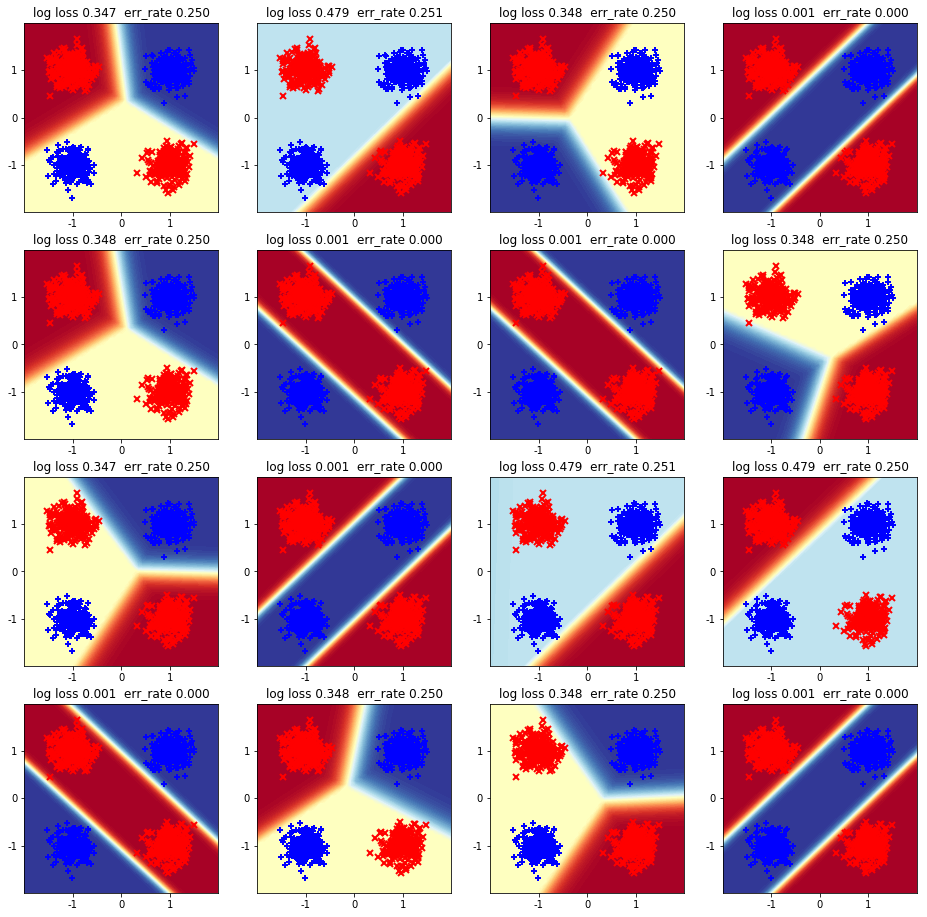

In [13]:
# TODO edit to plot all 16 runs from 1c above
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[0], x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[1], x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[2], x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[3], x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[4], x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[5], x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[6], x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[7], x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[8], x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[9], x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[10], x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[11], x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[12], x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[13], x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[14], x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_relu_sgd_list[15], x_tr_N2, y_tr_N, ax=ax_grid[3,3])

### **1c(ii):** What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1c converge).


**Answer**: 6/16 of the runs reach 0 training error. For the other runs, a local minimum is reached which results in wrong predictions being made. This is responsible for the >0 error rates observed in these other runs. Runtimes for ReLU+SGD are noticeably slower than the observed runtimes for LBFGS (1.2-5.7s for all runs)

### **1c(iii):** What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in 1a (using the same ReLU activation function)?


**Answer**: 

There is improved performance when changing from ReLU + L-BFGS (4/16) to ReLU + SGD (6/16). This is because L-BFGS is a method that chooses the step size based on the second-order derivative. This has the potential of being stuck at local shadow minima and hence failure to accurately classify all samples. SGD, on the other hand uses the first order derivative which is less prone to the same errors as it follows noisy data which allows it to 'escape' local minima. 

Howevever, as seen in in the results, the SGD runs that resulted in correct predictions did not converge. If the runs were not terminated at 400 epochs, they could go on for significantly longer, resulting in slower performance. This is because second-order methods have faster performance as the number of iterations needed to reach the global minimum is less than that of first-order methods like SGD. 

Overall, there is a tradeoff between accuracy and speed as we move from one method to the other. 

## Problem 1d: MLP size [2] with activation Logistic and SGD solver

In [9]:
# TODO edit to do 16 runs of SGD, like in 1c but with LOGISTIC activation
n_runs = 16
mlp_logistic_sgd_list = []
for i in range (1,17):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=(i-1),
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i-1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    mlp_logistic_sgd_list.append(mlp_sgd)

finished SGD run  0/16 after    0.6 sec |  46 epochs | converged     | loss 0.693
finished SGD run  1/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  2/16 after    5.2 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after    0.8 sec |  64 epochs | converged     | loss 0.693
finished SGD run  4/16 after    4.9 sec | 378 epochs | converged     | loss 0.354
finished SGD run  5/16 after    5.4 sec | 400 epochs | NOT converged | loss 0.019
finished SGD run  6/16 after    5.4 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after    2.6 sec | 196 epochs | converged     | loss 0.358
finished SGD run  8/16 after    5.4 sec | 400 epochs | NOT converged | loss 0.357
finished SGD run  9/16 after    5.2 sec | 400 epochs | NOT converged | loss 0.584
finished SGD run 10/16 after    0.8 sec |  60 epochs | converged     | loss 0.693
finished SGD run 11/16 after    0.8 sec |  60 epochs | converged     | loss 0.693
finished SGD run

### 1d(i): Visualize probabilistic predictions in 2D feature space for Logistic+SGD

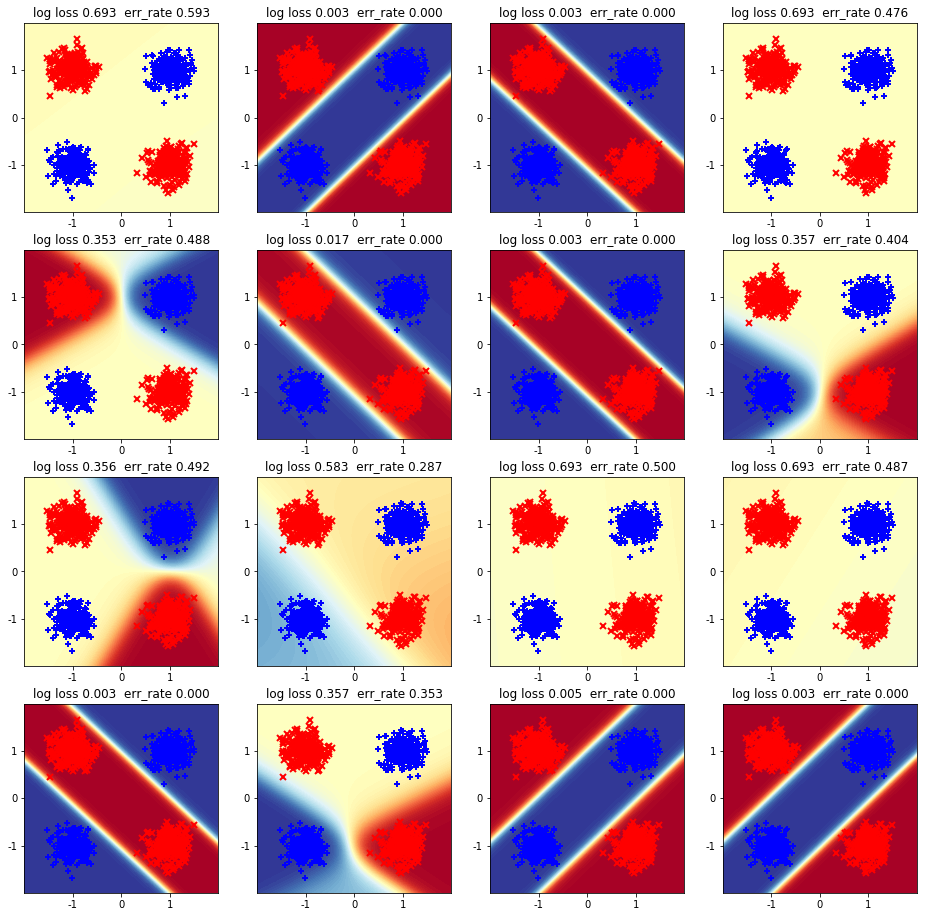

In [14]:
# TODO edit to plot all 16 runs from 1d above
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[0], x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[1], x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[2], x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[3], x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[4], x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[5], x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[6], x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[7], x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[8], x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[9], x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[10], x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[11], x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[12], x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[13], x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[14], x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_logistic_sgd_list[15], x_tr_N2, y_tr_N, ax=ax_grid[3,3])

### **1d(ii):** What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1d converge).



**Answer**: 7/16 of the runs reach 0 training error. For the other runs, a local minimum is reached which results in wrong predictions being made. This is responsible for the >0 error rates observed in these other runs. Runtimes for LogisticSigmoid+SGD are noticeably slower than the observed runtimes for LogisticSigmoid + LBFGS (0.6-5.4s for all runs)

### **1d(iii):** What is most noticeably different between this SGD run with batch size 10 and the previous L-BFGS run with logistic activations? What explanation can you provide for why this happens?


**Answer**: 

There is improved performance when changing from LogisticSigmoid + L-BFGS (6/16) to LogisticSigmoid + SGD (7/16). This is because L-BFGS is a method that chooses the step size based on the second-order derivative. This has the potential of being stuck at local shadow minima and hence failure to accurately classify all samples. SGD, on the other hand uses the first order derivative which is less prone to the same errors as it follows noisy data which allows it to 'escape' local minima. 

Howevever, as seen in in the results, the SGD runs that resulted in correct predictions did not converge. If the runs were not terminated at 400 epochs, they could go on for significantly longer, resulting in slower performance. This is because second-order methods have faster performance as the number of iterations needed to reach the global minimum is less than that of first-order methods like SGD. 

Overall, there is a tradeoff between accuracy and speed as we move from one method to the other. 

### Problem 1e: Comparing loss_curves

### **1e(i):** Plot loss_curves for each method from 1a-1d in 2 x 2 subplot grid

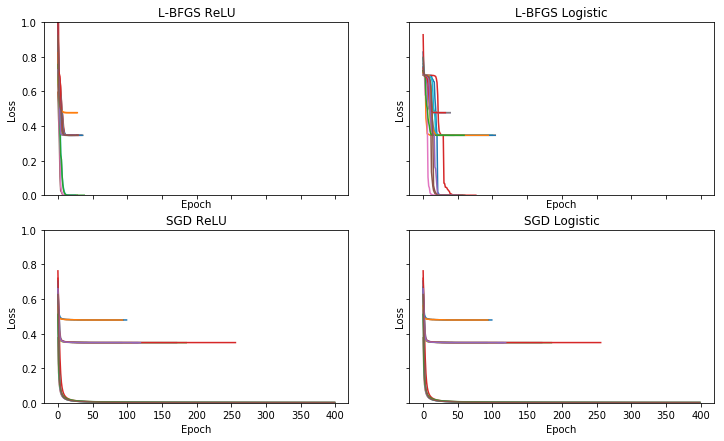

In [47]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,7))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,0].set_xlabel('Epoch')
ax_grid[0,0].set_ylabel('Loss')
for i in range(1,17):
    ax_grid[0,0].plot(mlp_relu_lbfgs_list[i-1].loss_curve_)

ax_grid[0,1].set_title('L-BFGS Logistic')
ax_grid[0,1].set_xlabel('Epoch')
ax_grid[0,1].set_ylabel('Loss')
for i in range(1,17):
    ax_grid[0,1].plot(mlp_logistic_lbfgs_list[i-1].loss_curve_)
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,0].set_xlabel('Epoch')
ax_grid[1,0].set_ylabel('Loss')
for i in range(1,17):
    ax_grid[1,0].plot(mlp_relu_sgd_list[i-1].loss_curve_)
    
ax_grid[1,1].set_title('SGD Logistic')
ax_grid[1,1].set_xlabel('Epoch')
ax_grid[1,1].set_ylabel('Loss')
for i in range(1,17):
    ax_grid[1,1].plot(mlp_relu_sgd_list[i-1].loss_curve_)
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

### **1e(ii):** From this overview plot (plus your detailed plots from 1a-1d), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?

**Answer:** 

Based on the overview, it seems that ReLU is easier to optimize than Logistic Sigmoid. This is because for L-BFGS plots, the number of iterations needed for convergence is less for ReLU than Logistic Sigmoid. This means that less steps were needed to reach the optimal solution/ is easier to optimize.

LogisticSigmoid function requires more iterations on average



### **1e(iii):** Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: 

We cannot conclude that ReLU is easier to optimize this is seen in the plots for SGD where the number of iterations needed for convergence for both methods are roughly equal. 

3 potential experimental comparisons: 
    1. Use data that contains many extreme data points from both ends (high and low)
    2. Use data that contains many 0s 
    3. Use very large datasets

### **1e(iv):** list 2 reasons to prefer L-BFGS over SGD, and 2 reasons to prefer SGD over L-BFGS.

**Answer**: 

Reasons to prefer L-BFGS over SGD:
    1. Faster performance times (requires less iterations to reach minima)
    2. Can accurately reach the global minimum in 1 step if loss function is quadratic
    
Reasons to prefer SGD over L-BFGS:
    1. Is less prone to local minima (due to following noisy data)
    2. Faster performance times overall when dataset is very large
    


### **1e(v):** list 2 reasons to prefer ReLU over logistic, and 2 reasons to prefer Logistic Sigmoid over ReLU

**Answer**:

Reasons to prefer ReLU over LogisticSigmoid:
    1. Is able to reflect changes in data at extreme values
    2. Easier to compute
    
Reasons to prefer LogisticSigmoid over ReLU:
    1. ReLU is fragile during training as neurons can die off
    2. ReLU cannot compute changes at 0.
    